Importing all important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Reading Dataset

In [3]:
data = pd.read_csv('genres_v2.csv')
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


Counting Missing value percentage from columns

In [6]:
missing_data = data.isnull().mean()*100
missing_data = missing_data[missing_data>0]

print(missing_data)

song_name     49.133672
Unnamed: 0    50.880511
title         50.880511
dtype: float64


In [7]:
data.drop(['song_name', 'Unnamed: 0', 'title'], axis=1, inplace=True)

Columns with zero variance

In [8]:
zero_var_col = []

for col in data:
    if(data[col].nunique() <=1):
        zero_var_col.append(col)

print(zero_var_col)

df = data.drop(zero_var_col, axis=1)

['type']


Diffrentiating categorical and numerical columns in list 

In [9]:
cat = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Categorical : ', cat)
num = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical : ', num)

Categorical :  ['id', 'uri', 'track_href', 'analysis_url', 'genre']
Numerical :  ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


Dropping unnesecary columns for analysis

In [10]:
df.drop(['id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

Data visualisation 

Relation between Genre and numerical features

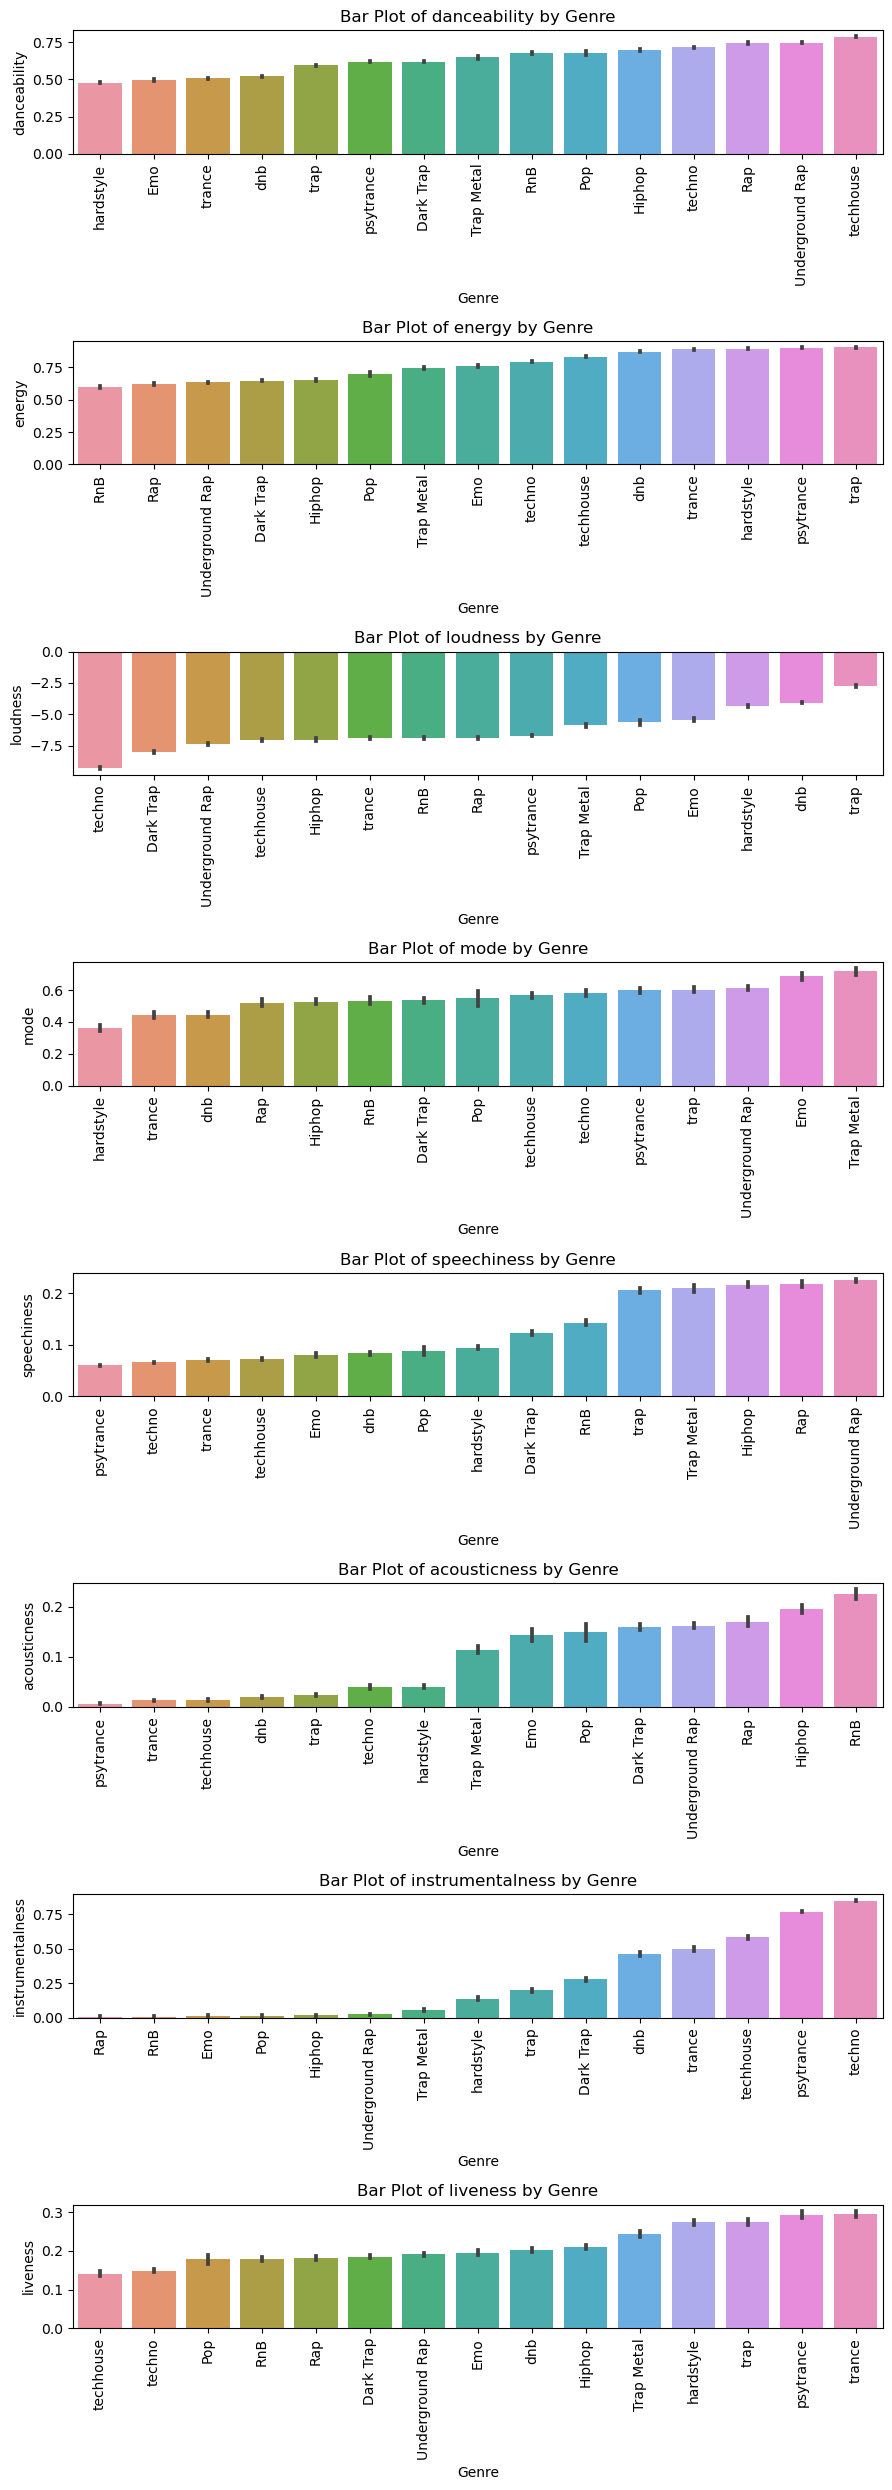

In [11]:
numerical_columns = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Create subplots
fig, axes = plt.subplots(8,1,figsize=(9, 25))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(numerical_columns):
    sorted_categories = df.groupby('genre')[col].mean().sort_values().index
    sns.barplot(x='genre', y=col, data=df, ax=axes[i], order=sorted_categories)
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Bar Plot of {col} by Genre')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

Relation between Energy and danceability grouped by genre

Text(0.5, 1.0, 'Relation between energy and danceability')

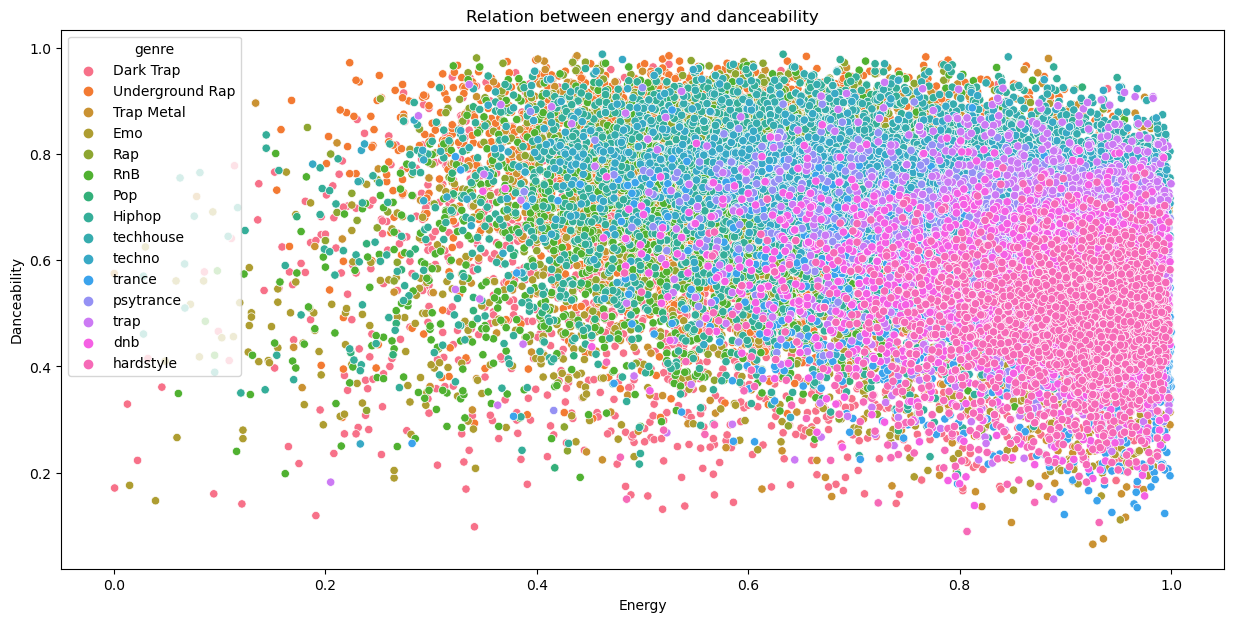

In [12]:
plt.figure(figsize=[15,7])
sns.scatterplot(data= df, y= 'danceability', x= 'energy', hue='genre')
plt.xlabel("Energy")
plt.ylabel('Danceability')
plt.title('Relation between energy and danceability')

Relation between Key and tempo grouped by genre

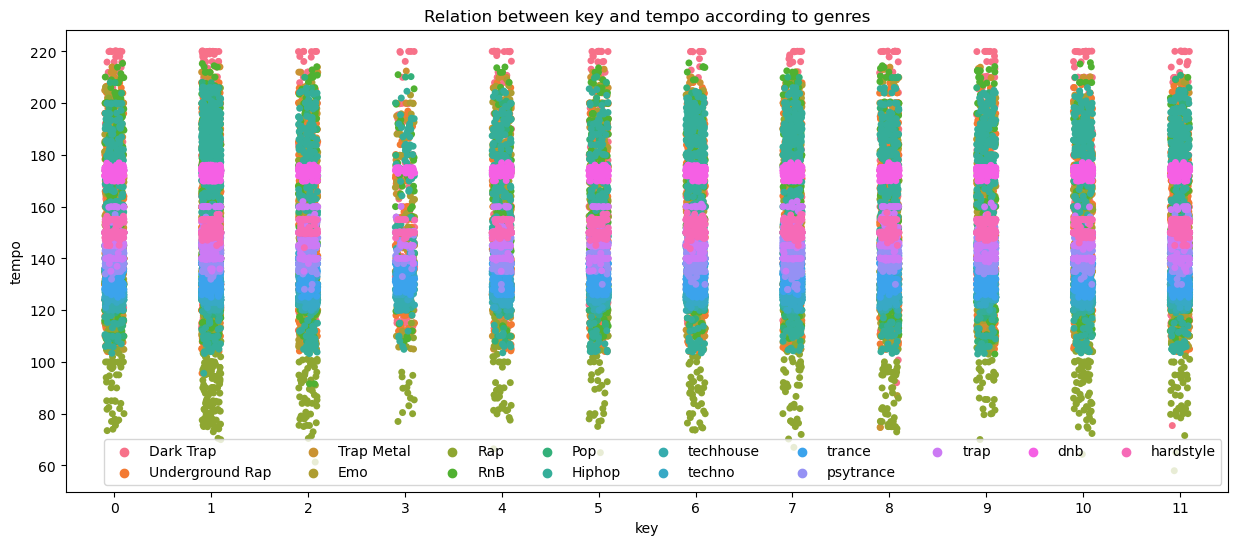

In [13]:
plt.figure(figsize=[15,6])
sns.stripplot(data= df, y= df['tempo'], x= df['key'], hue='genre')
plt.xlabel("key")
plt.ylabel('tempo')
plt.title('Relation between key and tempo according to genres')
plt.legend(ncol=9, loc="lower right")

Relation between danceability and loudness

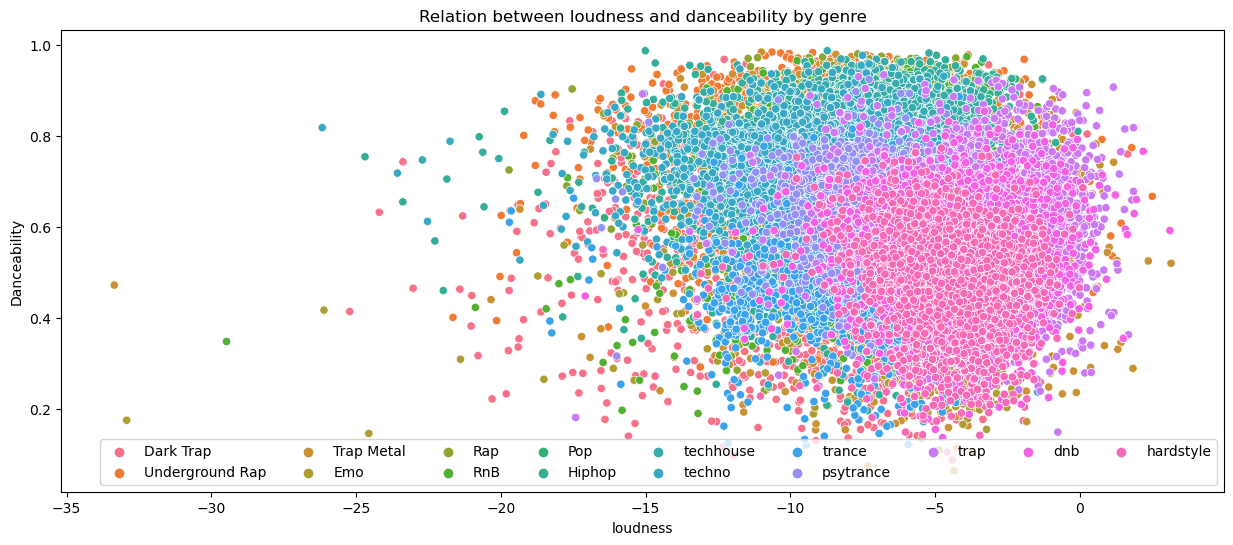

In [14]:
plt.figure(figsize=[15,6])
sns.scatterplot(data= df, y= df['danceability'], x= df['loudness'], hue='genre')
plt.xlabel("loudness")
plt.ylabel('Danceability')
plt.title('Relation between loudness and danceability by genre')
plt.legend(ncol=9, loc="lower right")

Relation between Spechiness with respect to acousticness and instrumentalness

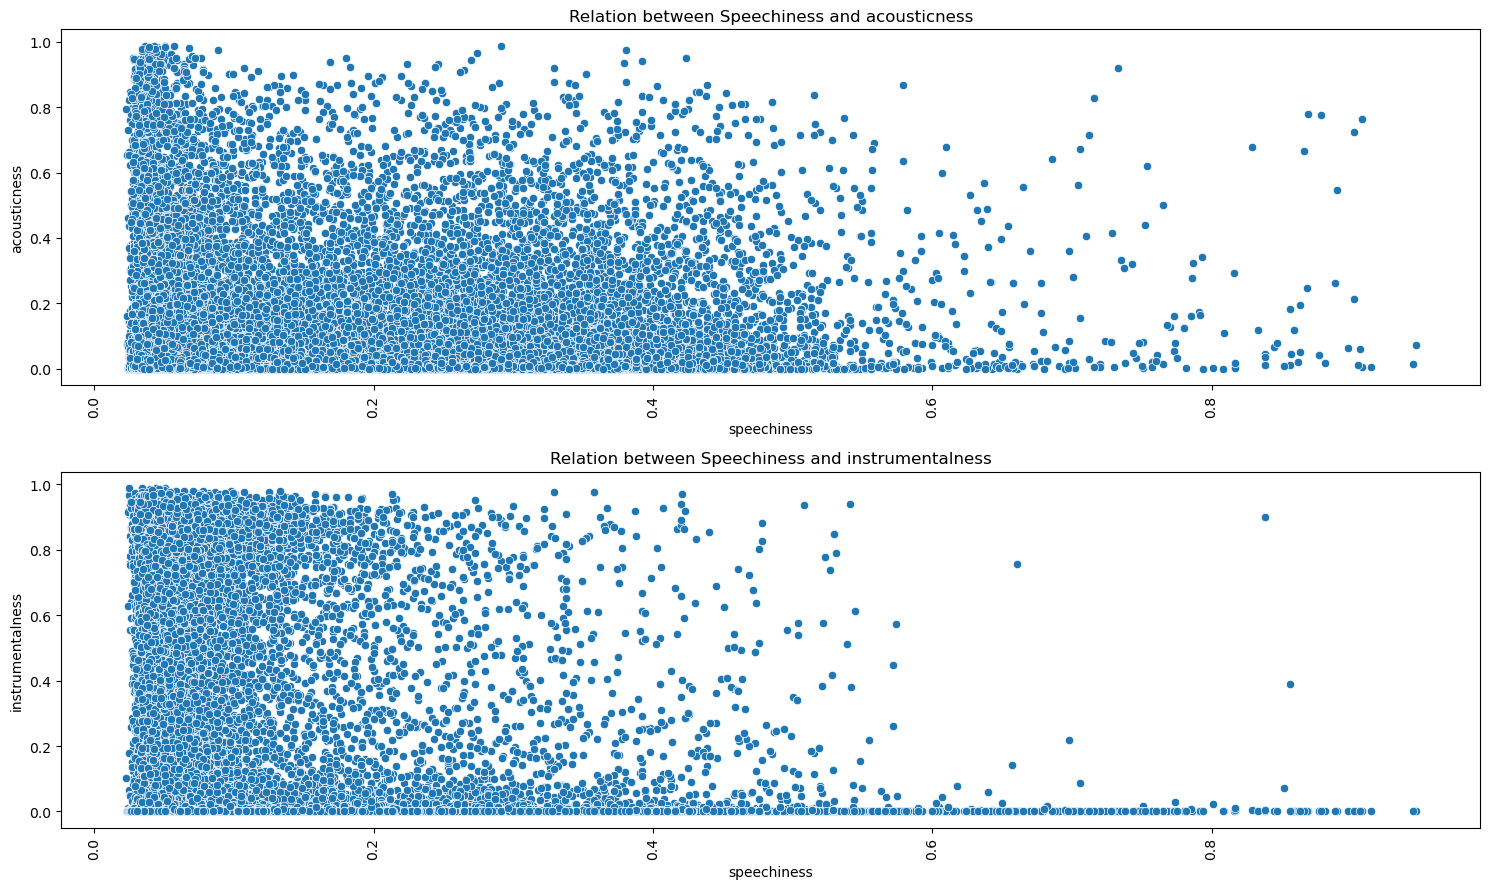

In [15]:
numerical_columns = ['acousticness', 'instrumentalness']

# Create subplots
fig, axes = plt.subplots(2,1,figsize=(15, 9))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df['speechiness'], y=col, data=df, ax=axes[i])
    axes[i].set_xlabel('speechiness')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Relation between Speechiness and {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

Outliers

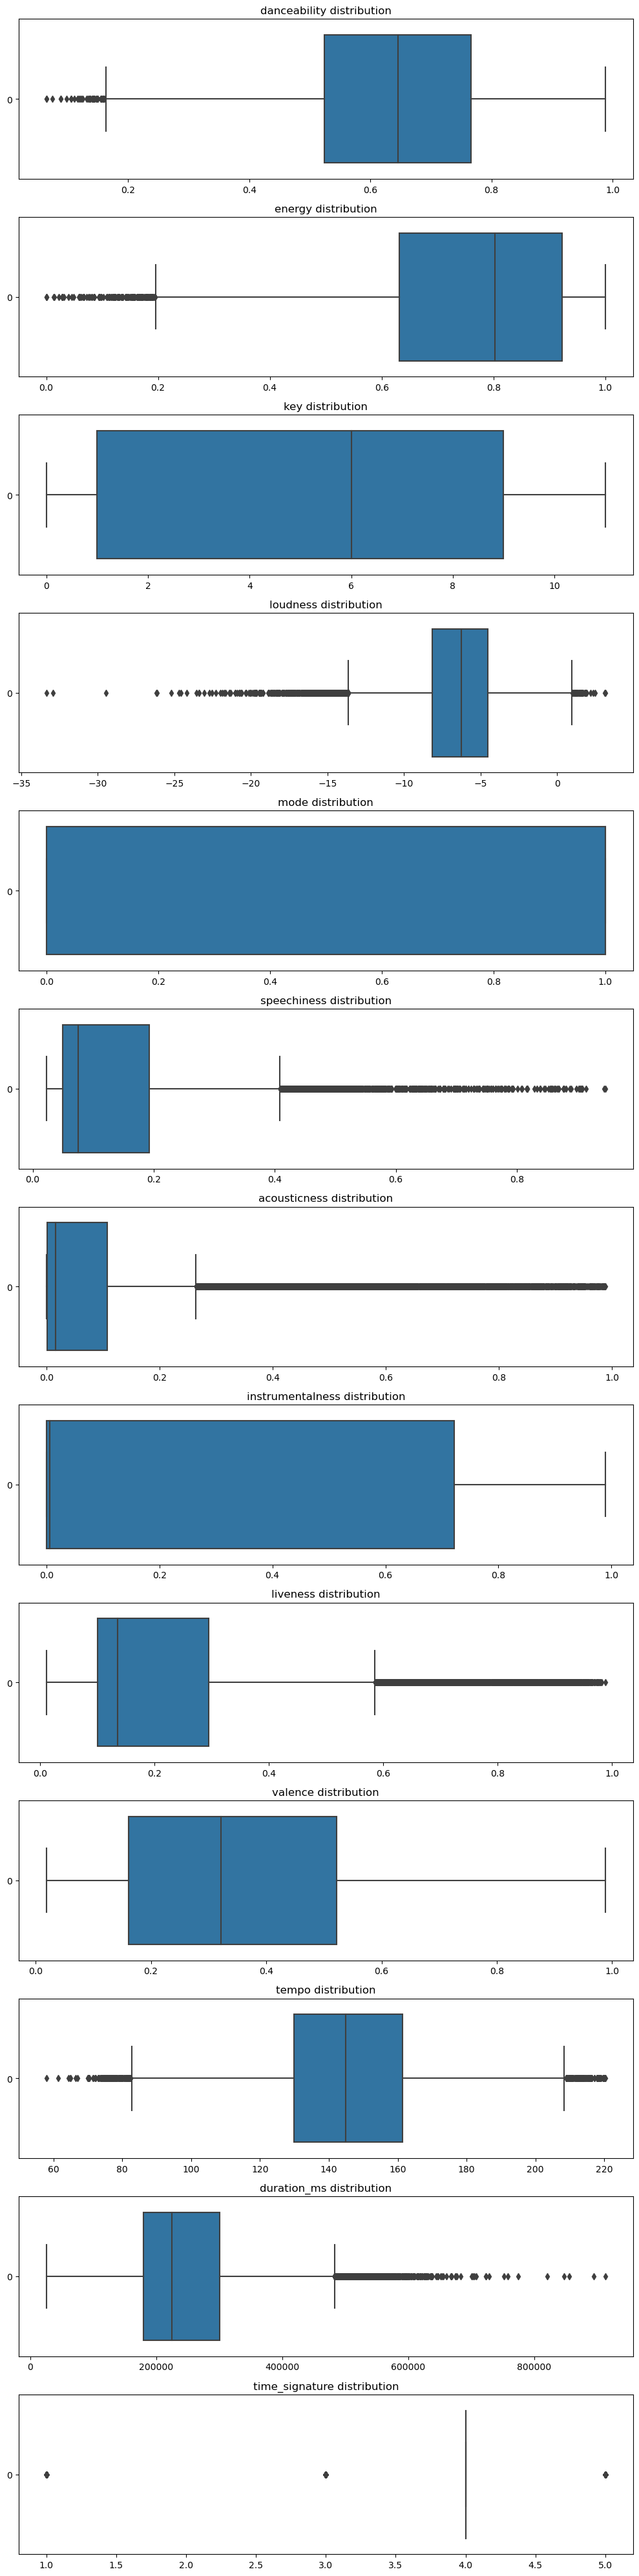

In [16]:
numerical_columns = num

# Create subplots
fig, axes = plt.subplots(len(numerical_columns),1, figsize=(10,40))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'{col} distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
def remove_outliers(df, conditions, tot_row):
    df1 = df
    del_row = 0
    data_loss = 0
    for cond in conditions:
        tot = df.shape[0]
        df = df[cond]
        del_row = del_row + (tot - df.shape[0])

    print(f'deleted rows : {del_row} out of {tot_row}')
    print(f'data lost : {(del_row/tot_row * 100)}')
    print(df.shape[0])
    
    if(data_loss<8):
        print('Data loss is minimum, so outliers deleted')
        return df
    else:
        print('Data loss is significant, so outliers are not deleted and needs treatment')
        return df1



In [18]:
condition_list = (df['energy']>0.06, df['danceability']>0.06, df['loudness']>-30, df['speechiness']<0.9,df['acousticness']<0.9, df['liveness']<0.9, df['tempo']>70, df['duration_ms']<800000)
df1 =df
df1 = remove_outliers(df1, condition_list, df1.shape[0])


deleted rows : 431 out of 42305
data lost : 1.0187921049521333
41874
Data loss is minimum, so outliers deleted


In [19]:
print(f'rows before - {df.shape[0]}')
print(f'rows after - {df1.shape[0]}')

rows before - 42305
rows after - 41874


Correlation Matrix

<Axes: >

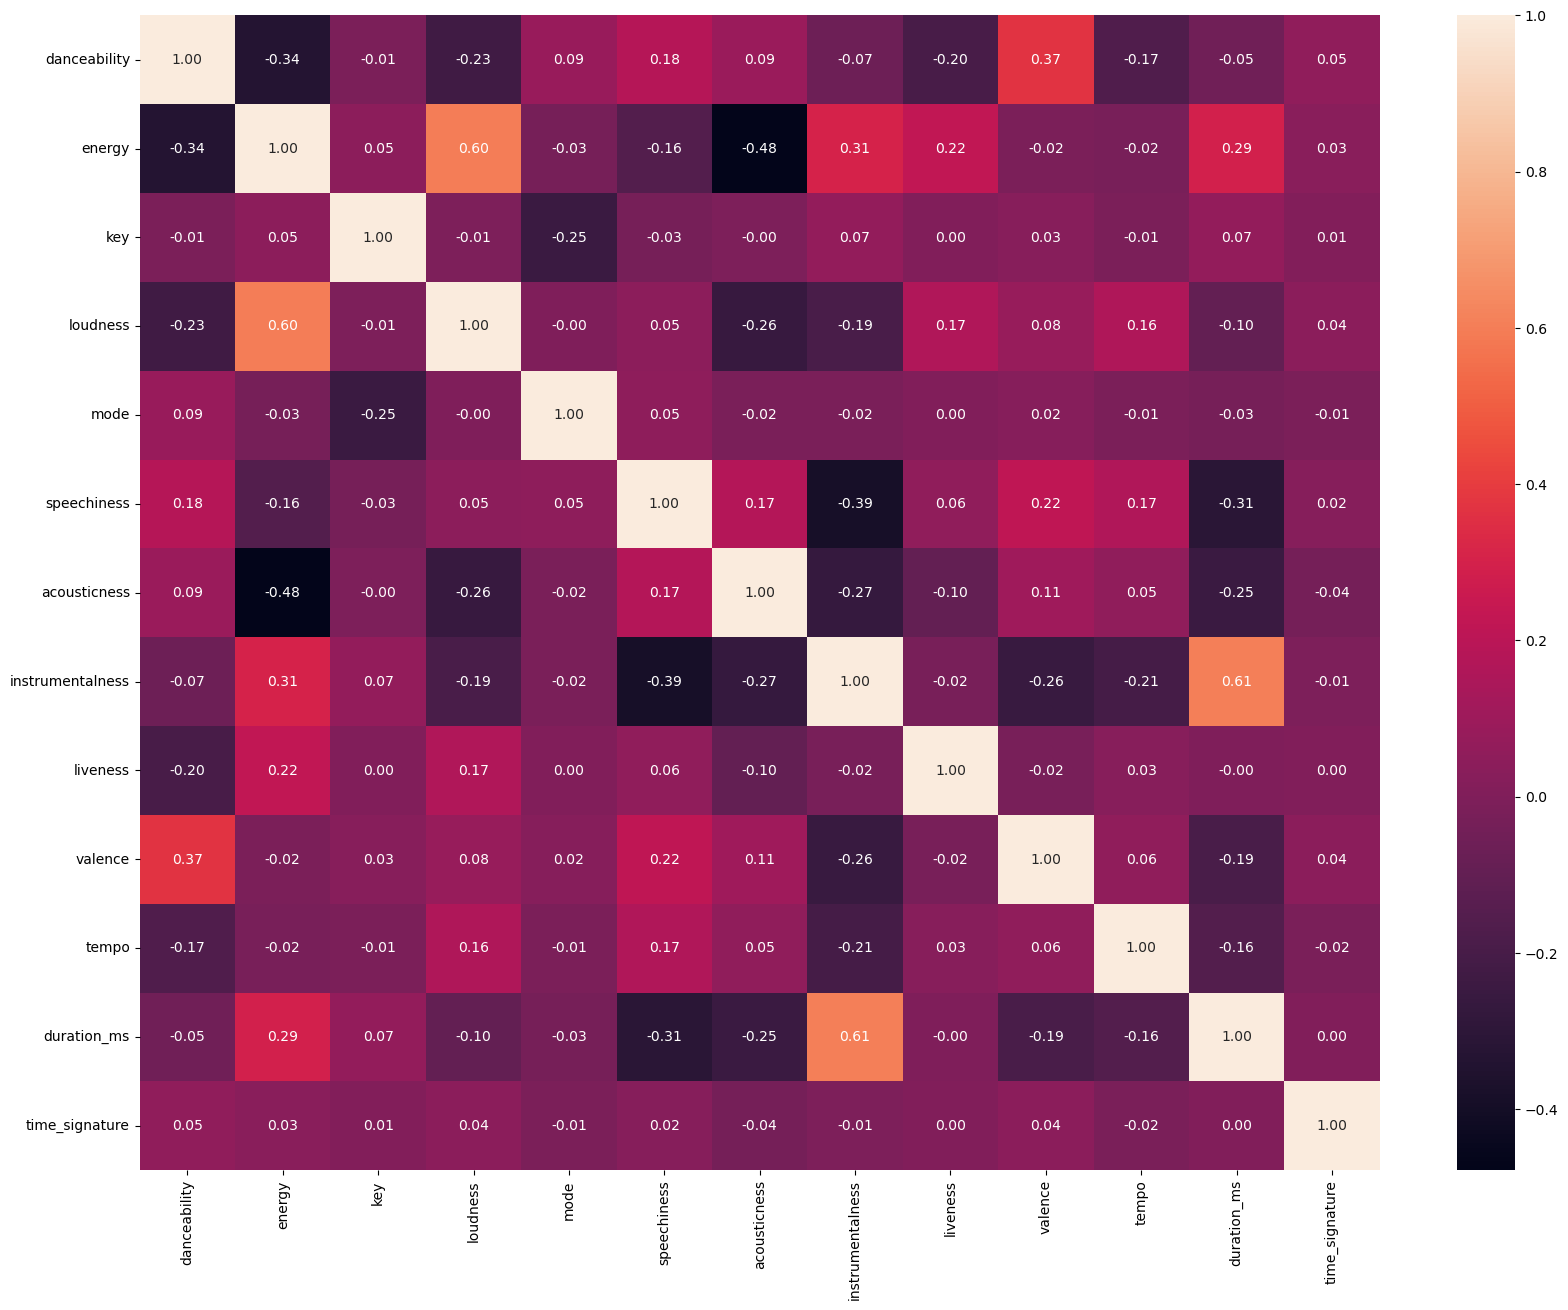

In [20]:
plt.figure(figsize=[20,15])
sns.heatmap(data= df1.select_dtypes(include=[np.number]).corr(), annot = True, fmt = '.2f')

In [21]:
%pip install feature.engine

Note: you may need to restart the kernel to use updated packages.


In [22]:
from feature_engine.selection import DropCorrelatedFeatures

tr = DropCorrelatedFeatures(variables= None, method='pearson', threshold=0.75)

uncorrelated_data = tr.fit_transform(df1.select_dtypes(include=[np.number]))

print(tr.correlated_feature_sets_)

print(tr.features_to_drop_)

uncorrelated_data.head()

[]
set()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


Encoding Categorical Data

In [23]:
cats = df1.select_dtypes(exclude=[np.number])
cats.head()

,genre
0,Dark Trap
1,Dark Trap
2,Dark Trap
3,Dark Trap
4,Dark Trap


In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and perform label encoding
for column in cats.columns:
    # Fit label encoder and transform the categorical column
    cats[column] = label_encoder.fit_transform(cats[column])

cats.head()

,genre
0,0
1,0
2,0
3,0
4,0


Merging Categorical and Numerical columns

In [25]:
df1 = pd.concat([uncorrelated_data, cats], axis=1)
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,0
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,0
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,0
